In [6]:
import sys, os
import datetime
import logging
import matplotlib.pyplot as plt
from matplotlib import dates, rcParams
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [7]:
def read_data():
    df = pd.io.parsers.read_csv(
        'speedtest.log',
        names='date time ping download upload'.split(),
        header=None,
        sep=r'\s+',
        parse_dates={'timestamp':[0,1]},
        na_values=['TEST','FAILED'])
    for col in 'ping download upload'.split():
        df[col] = df[col].fillna(0.0)
    # print(df)
    # records every 10 min, or 6/hr, or 6*24=144/day
    Nrows = 5*144  # 5 days
    return df[-Nrows:].copy() # return dots for last Nrows only

In [8]:
def make_plot(plt, df, row_index=1, nhours=2):
    # ---------------------------------
    # select last "nhours" of data
    index_max = df.index[-1]
    dtmax = df.loc[index_max,'timestamp']
    dtmin = dtmax - datetime.timedelta(hours=nhours)

    mask = df['timestamp'] > dtmin
    df = df.loc[mask,:].copy()
    df.index = range(len(df))
    # ---------------------------------
    # subplot(nrows, ncols, index, **kwargs)
    plt.subplot(3, 1, row_index)
    plt.plot(df['timestamp'],df['download'], 'b-')
    plt.title('Internet Speed (Download in Mbps)')
    plt.ylabel('Bandwidth in MBps')
    y_range = 1.2*df.download.max()
    plt.ylim(0.0,y_range)
    plt.xlabel('Date/Time')
    plt.xticks(rotation='45', ha='right')
    # ---------------------------------
    ax = plt.gca()
    fg = plt.gcf()

    start = df.loc[0,'timestamp']
    end   = df.loc[df.index[-1],'timestamp']
    delta = (end-start)/11.0
    arr = [start]
    for ii in range(12):
        val = arr[-1]
        arr += [val+delta]

    ax.xaxis.set_ticks(arr)
    h_fmt = dates.DateFormatter('%m/%d %H:%M')
    ax.xaxis.set_major_formatter(h_fmt)
    # ---------------------------------
    ax.xaxis.set_tick_params(labelsize=9)
    ax.yaxis.set_tick_params(labelsize=9)

    fg.subplots_adjust(bottom=.25)
    plt.grid();

In [9]:
df = read_data()

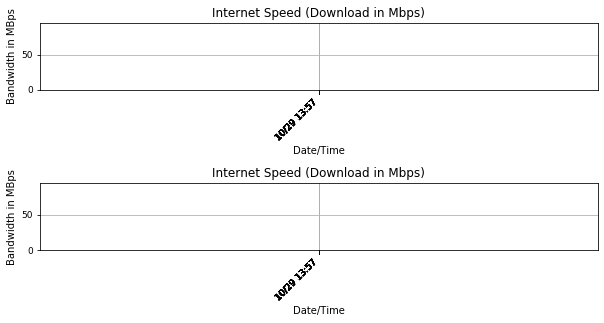

In [10]:
w = 10
h = 5
rcParams['figure.figsize'] = w, h
plt.gcf().clear()
make_plot(plt, df.copy(), row_index=1, nhours=10*24)
make_plot(plt, df.copy(), row_index=3, nhours=2   )
plt.show()